In [3]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("survey lung cancer.xlsx")

# Display the first few rows
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


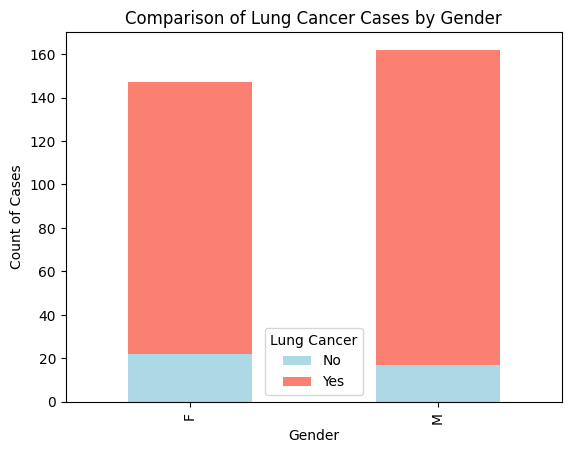

In [20]:
# Count occurrences of lung cancer by gender
gender_cancer_counts = df.groupby(["GENDER", "LUNG_CANCER"]).size().unstack()

# Plot the comparison
gender_cancer_counts.plot(kind="bar", stacked=True, color=["lightblue", "salmon"])
plt.title("Comparison of Lung Cancer Cases by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Cases")
plt.legend(title="Lung Cancer", labels=["No", "Yes"])
plt.show()

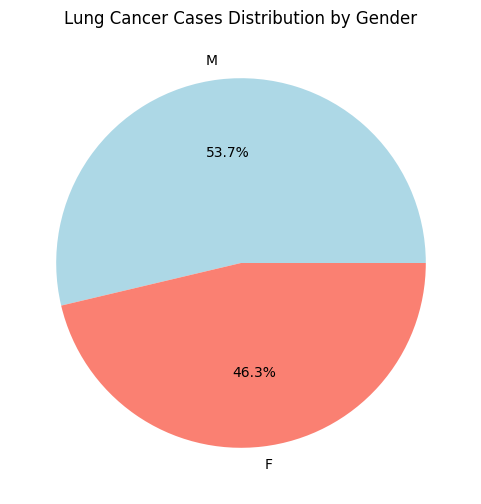

In [19]:
# Count lung cancer cases by gender
gender_cancer_counts = df[df["LUNG_CANCER"] == "YES"]["GENDER"].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
gender_cancer_counts.plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "salmon"])
plt.title("Lung Cancer Cases Distribution by Gender")
plt.ylabel("")  # Hide y-axis label
plt.show()

Correlation between Age and Fatigue:
              AGE   FATIGUE
AGE      1.000000  0.012614
FATIGUE  0.012614  1.000000


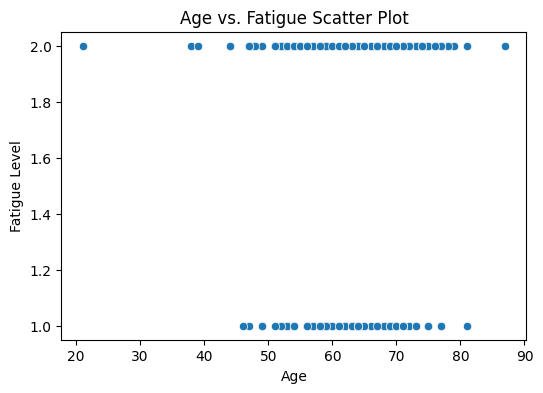

In [25]:
# Analyze the correlation between age and fatigue
# Rename columns for better readability (removing spaces)
df.rename(columns={'FATIGUE ': 'FATIGUE'}, inplace=True)

# Compute correlation
correlation = df[['AGE', 'FATIGUE']].corr(method='pearson')

print("Correlation between Age and Fatigue:")
print(correlation)

# Visualize correlation
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['AGE'], y=df['FATIGUE'])
plt.title("Age vs. Fatigue Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Fatigue Level")
plt.show()



In [ ]:
# - The script calculates the Pearson correlation coefficient between AGE and FATIGUE.
- It renames the FATIGUE column to remove extra space.
- A scatter plot is used to visualize any relationship between age and fatigue.
A correlation value close to 1 or -1 indicates a strong relationship, while a value close to 0 suggests little to no correlation.


In [16]:
# Count males with lung cancer
male_cancer_count = df[(df["GENDER"] == "M") & (df["LUNG_CANCER"] == "YES")].shape[0]

print(f"Total males with lung cancer: {male_cancer_count}")

Total males with lung cancer: 145


In [15]:
# Count females with lung cancer
female_cancer_count = df[(df["GENDER"] == "F") & (df["LUNG_CANCER"] == "YES")].shape[0]

print(f"Total females with lung cancer: {female_cancer_count}")

Total females with lung cancer: 125


In [14]:
# Count lung cancer cases among smokers vs. non-smokers
smoking_cancer_counts = df.groupby(["SMOKING", "LUNG_CANCER"]).size().unstack()

print(smoking_cancer_counts)

LUNG_CANCER  NO  YES
SMOKING             
1            20  115
2            19  155


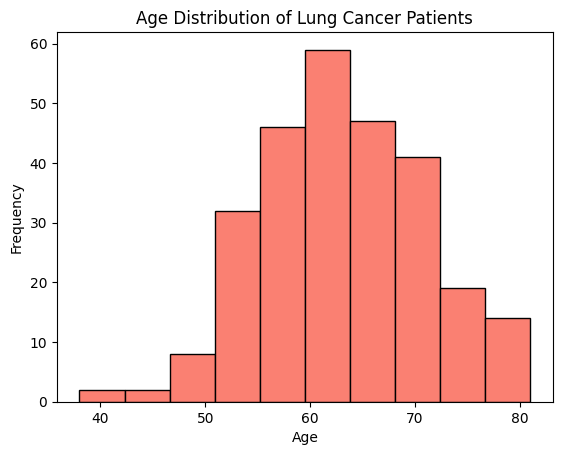

In [21]:
#Age Distribution Among Lung Cancer Patients
import matplotlib.pyplot as plt

lung_cancer_ages = df[df["LUNG_CANCER"] == "YES"]["AGE"]

plt.hist(lung_cancer_ages, bins=10, color='salmon', edgecolor='black')
plt.title("Age Distribution of Lung Cancer Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [22]:
#Investigate how peer pressure correlates with smoking habits
peer_smoking_counts = df.groupby(["PEER_PRESSURE", "SMOKING"]).size().unstack()

print(peer_smoking_counts)

SMOKING         1   2
PEER_PRESSURE        
1              64  90
2              71  84


In [23]:
#Determine if chronic diseases are prevalent among lung cancer patients
chronic_cancer_counts = df.groupby(["CHRONIC DISEASE", "LUNG_CANCER"]).size().unstack()

print(chronic_cancer_counts)

LUNG_CANCER      NO  YES
CHRONIC DISEASE         
1                25  128
2                14  142
